In [6]:
from sklearn import ensemble, cross_validation, learning_curve, metrics

import numpy as np
import pandas as pd
import xgboost as xgb

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
bioresponse = pd.read_csv('data/bioresponse.csv', header=0, sep=',')

In [10]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [11]:
bioresponse_target = bioresponse.Activity.values
bioresponse_data = bioresponse.iloc[:, 1:]

# random forrest model

In [32]:
n_trees = list(range(1, 50, 5))


In [33]:
%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators=n_tree,
                                               min_samples_split=5)
    score = cross_validation.cross_val_score(estimator,
                                             bioresponse_data,
                                             bioresponse_target,
                                             scoring='accuracy',
                                             cv=3)
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


In [34]:
scoring

matrix([[ 0.65307754,  0.7072    ,  0.6744    ],
        [ 0.76258993,  0.748     ,  0.7552    ],
        [ 0.75859313,  0.7712    ,  0.7592    ],
        [ 0.77617906,  0.756     ,  0.7968    ],
        [ 0.77697842,  0.772     ,  0.7848    ],
        [ 0.79056755,  0.7752    ,  0.7976    ],
        [ 0.78257394,  0.7712    ,  0.7832    ],
        [ 0.7873701 ,  0.7704    ,  0.7936    ],
        [ 0.78816946,  0.7736    ,  0.7936    ],
        [ 0.79296563,  0.7752    ,  0.7904    ]])

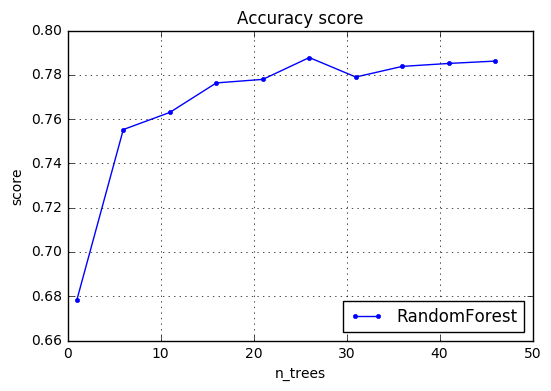

In [35]:
pylab.plot(n_trees, scoring.mean(axis=1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

# xgboost

In [36]:
%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, 
                                  max_depth=5,
                                  n_estimators=n_tree,
                                  min_child_weight=3)
    score = cross_validation.cross_val_score(estimator,
                                             bioresponse_data,
                                             bioresponse_target,
                                             scoring='accuracy',
                                             cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs


In [37]:
xgb_scoring


matrix([[ 0.76498801,  0.756     ,  0.756     ],
        [ 0.77697842,  0.7632    ,  0.7656    ],
        [ 0.77777778,  0.772     ,  0.772     ],
        [ 0.78177458,  0.7712    ,  0.7768    ],
        [ 0.7833733 ,  0.7776    ,  0.7768    ],
        [ 0.79216627,  0.7752    ,  0.7808    ],
        [ 0.79696243,  0.78      ,  0.78      ],
        [ 0.79376499,  0.78      ,  0.7784    ],
        [ 0.79456435,  0.7856    ,  0.7792    ],
        [ 0.79936051,  0.7832    ,  0.7848    ]])

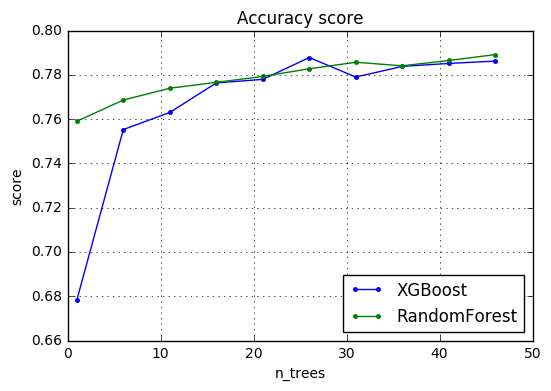

In [38]:
pylab.plot(n_trees, scoring.mean(axis=1), marker='.', label='XGBoost')
pylab.plot(n_trees, xgb_scoring.mean(axis=1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')